In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [74]:
data=pd.read_csv(r"/content/drive/MyDrive/Student_Performance.csv")
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [75]:
data.shape

(10000, 6)

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [77]:
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [78]:
data.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [79]:
data.duplicated().sum()

np.int64(127)

In [80]:
data.drop_duplicates(inplace=True)

In [81]:
data.shape

(9873, 6)

In [82]:
data.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [83]:
data=data[['Hours Studied','Previous Scores','Sleep Hours','Sample Question Papers Practiced','Performance Index']]

In [84]:
data.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,9,1,91.0
1,4,82,4,2,65.0
2,8,51,7,2,45.0
3,5,52,5,2,36.0
4,7,75,8,5,66.0


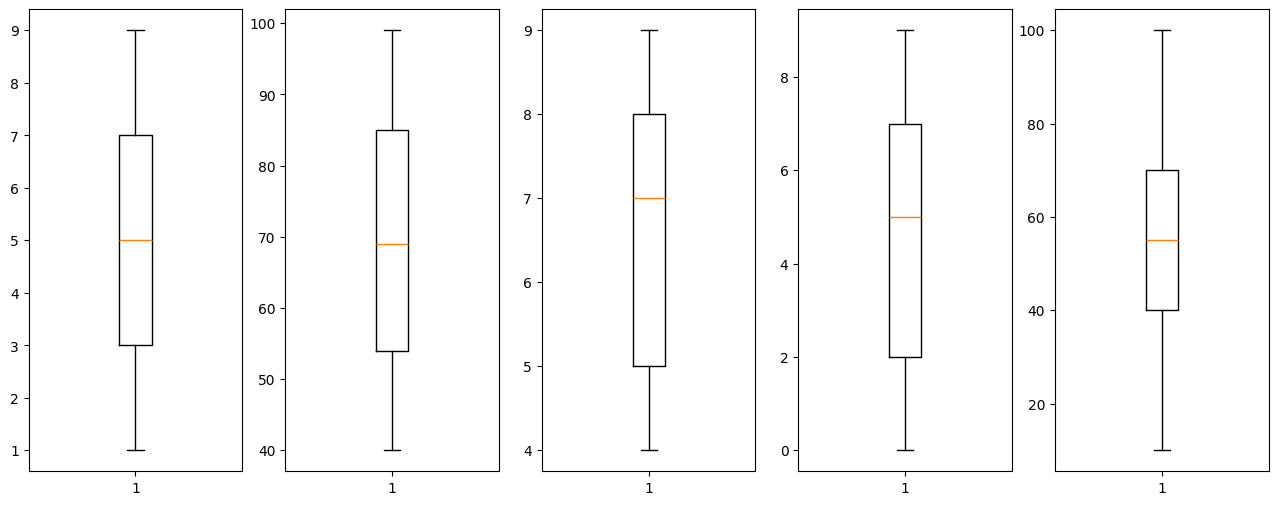

In [85]:
fig,axs=plt.subplots(1,5,figsize=(16,6))       #1=row means 1 row, 4=columns

axs[0].boxplot(data['Hours Studied'])
axs[1].boxplot(data['Previous Scores'])
axs[2].boxplot(data['Sleep Hours'])
axs[3].boxplot(data['Sample Question Papers Practiced'])
axs[4].boxplot(data['Performance Index'])
plt.show()

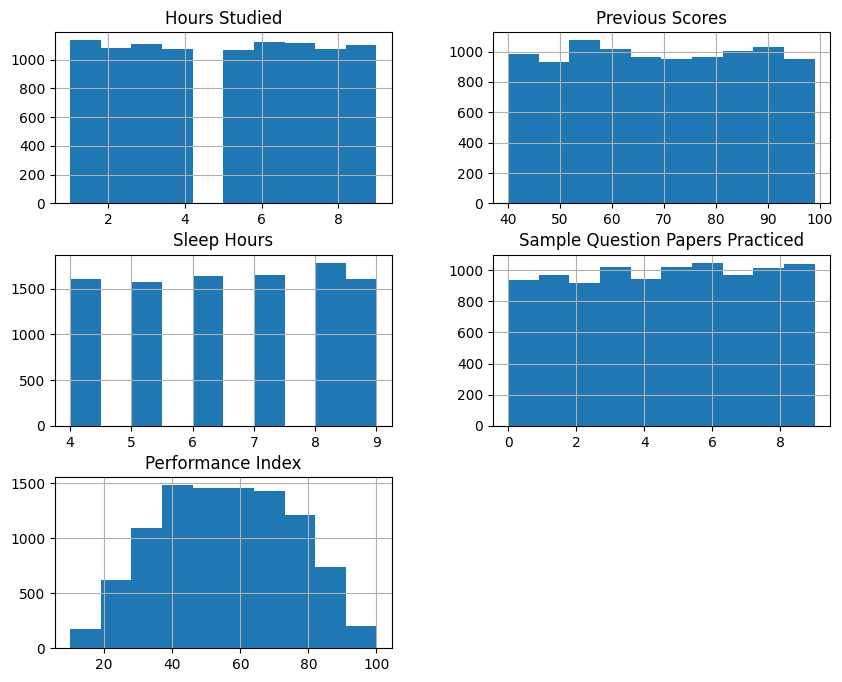

In [86]:
data.hist(figsize=(10,8))
plt.show()

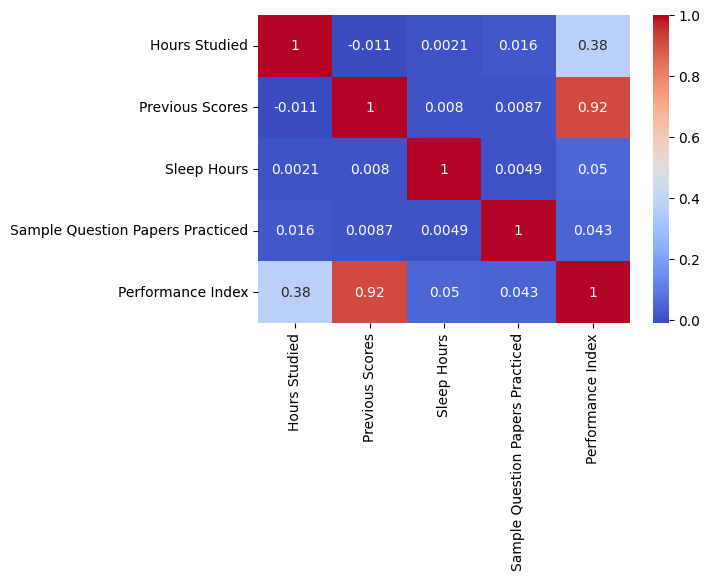

In [87]:
plt.figure(figsize=(6,4))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.show()

In [88]:
data.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,9,1,91.0
1,4,82,4,2,65.0
2,8,51,7,2,45.0
3,5,52,5,2,36.0
4,7,75,8,5,66.0


In [89]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [102]:
data["Hours Studied"]=scaler.fit_transform(data[["Hours Studied"]])
data["Previous Scores"]=scaler.fit_transform(data[["Previous Scores"]])
data["Sleep Hours"]=scaler.fit_transform(data[["Sleep Hours"]])
data["Sample Question Papers Practiced"]=scaler.fit_transform(data[["Sample Question Papers Practiced"]])
data["Performance Index"]=scaler.fit_transform(data[["Performance Index"]])



/tmp/ipython-input-2222673655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Hours Studied"]=scaler.fit_transform(data[["Hours Studied"]])
/tmp/ipython-input-2222673655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Previous Scores"]=scaler.fit_transform(data[["Previous Scores"]])
/tmp/ipython-input-2222673655.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [103]:
x=data[["Hours Studied", "Previous Scores",
       "Sleep Hours", "Sample Question Papers Practiced"]]
y=data["Performance Index"]

In [104]:
x.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
0,0.775566,1.706168,1.454025,-1.249715
1,-0.383205,0.724912,-1.491315,-0.900925
2,1.161822,-1.064438,0.275889,-0.900925
3,0.003052,-1.006717,-0.902247,-0.900925
4,0.775566,0.320865,0.864957,0.145444


In [105]:
x.shape,y.shape

((9873, 4), (9873,))

In [106]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [107]:
x_train.shape,x_test.shape

((7898, 4), (1975, 4))

In [108]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score

In [109]:
model=LinearRegression()
#now fit this model to our data
model.fit(x_train,y_train)

LinearRegression()

In [110]:
model.intercept_,model.coef_

(np.float64(-0.0005730692321310469),
 array([0.38433891, 0.91871522, 0.04134738, 0.02842397]))

In [111]:
predicted_val=model.predict(x_test)

In [112]:
predicted_val

array([-0.46956225,  1.2905438 ,  0.28930766, ...,  1.12296382,
        1.60094314, -1.02220885])

In [113]:
mean_squared_error(y_test,predicted_val)

0.012060079652069058

In [114]:
r2_score(y_test,predicted_val)

0.9880446845278523

In [115]:
#------------------Ploynomial Regression-----------
from sklearn.preprocessing import PolynomialFeatures

In [116]:
polynomial=PolynomialFeatures(degree=2)
poly_features=polynomial.fit_transform(x_train)
model=LinearRegression()
model.fit(poly_features,y_train)

LinearRegression()

In [117]:
0

(array([ 0.00000000e+00,  3.84292935e-01,  9.18768649e-01,  4.13809081e-02,
         2.84358467e-02,  9.45152743e-04,  1.69702175e-04,  2.02178233e-03,
         1.12558483e-03, -1.14317697e-03,  9.80397901e-05, -1.02116534e-03,
         1.15206602e-03,  1.33389663e-03, -1.49757464e-04]),
 np.float64(-0.0014087130044981855))

In [118]:
test_features=polynomial.fit_transform(x_test)

In [119]:
pred=model.predict(test_features)

In [120]:
#-----------------------svm------------------

In [ ]:
from sklearn.svm import SVC,SVR